# **Đồ án Khai phá dữ liệu - Nhóm 7**
### **Sinh viên thực hiện:**
* Lê Vĩnh Hân - 2251068192
* Nguyễn Thái Bảo Duy - 2251068181
* Đỗ Nguyên Giáp - 2251068189
#### Dataset: https://www.kaggle.com/datasets/cemeraan/3a-superstore

# **Importing module & Exploring Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [2]:
DATA_CLEAN = Path(r"C:\Users\pitou\Desktop\Data Mining\data_clean")
final_data = DATA_CLEAN / "final_data.parquet"
df = pl.read_parquet(str(final_data)) # đọc dữ liệu với polars

In [3]:
print(f'Số dòng: {df.height}')
print(f'Số cột: {len(df.columns)}')

Số dòng: 51185032
Số cột: 20


In [4]:
df.head()

order_id,order_date,order_year,order_month,order_weekday,branch_id,total_basket,region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price
str,datetime[μs],i32,i8,i8,str,f64,str,str,str,str,str,str,str,str,str,str,i64,f64,f64
"""2603465""",2022-05-21 00:00:00,2022,5,6,"""244-MA2""",2938.25,"""Doğu Anadolu""","""Malatya""","""AKÇADAĞ""","""12152""","""PASTEL NUDE OJE 764 (MIST)""","""KOZMETIK""","""MAKYAJ""","""MAKYAJ MALZEMELERI""","""OJE""","""PASTEL""",5,33.6,167.75
"""2594121""",2021-02-25 00:00:00,2021,2,4,"""265-VA3""",485.15,"""Doğu Anadolu""","""Van""","""BAHÇESARAY""","""13843""","""PASTEL OJE 63""","""KOZMETIK""","""MAKYAJ""","""MAKYAJ MALZEMELERI""","""OJE""","""PASTEL""",2,33.6,38.14
"""2707469""",2021-10-02 00:00:00,2021,10,6,"""265-VA3""",4303.89,"""Doğu Anadolu""","""Van""","""BAHÇESARAY""","""16675""","""PASTEL OJE 237""","""KOZMETIK""","""MAKYAJ""","""MAKYAJ MALZEMELERI""","""OJE""","""PASTEL""",8,33.6,196.48
"""2707571""",2021-01-09 00:00:00,2021,1,6,"""225-ER2""",214.41,"""Doğu Anadolu""","""Erzurum""","""AŞKALE""","""13842""","""PASTEL OJE 26""","""KOZMETIK""","""MAKYAJ""","""MAKYAJ MALZEMELERI""","""OJE""","""PASTEL""",5,33.6,85.45
"""2721027""",2022-12-17 00:00:00,2022,12,6,"""244-MA2""",1664.7,"""Doğu Anadolu""","""Malatya""","""AKÇADAĞ""","""10853""","""PASTEL OJE 65""","""KOZMETIK""","""MAKYAJ""","""MAKYAJ MALZEMELERI""","""OJE""","""PASTEL""",6,33.6,216.84


In [5]:
df.schema # df.info()

Schema([('order_id', String),
        ('order_date', Datetime(time_unit='us', time_zone=None)),
        ('order_year', Int32),
        ('order_month', Int8),
        ('order_weekday', Int8),
        ('branch_id', String),
        ('total_basket', Float64),
        ('region', String),
        ('branch_city', String),
        ('branch_town', String),
        ('item_id', String),
        ('item_name', String),
        ('category1', String),
        ('category2', String),
        ('category3', String),
        ('category4', String),
        ('brand', String),
        ('amount', Int64),
        ('unit_price', Float64),
        ('total_price', Float64)])

In [6]:
df.describe()

statistic,order_id,order_date,order_year,order_month,order_weekday,branch_id,total_basket,region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price
str,str,str,f64,f64,f64,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64
"""count""","""51185032""","""51177293""",5.1177293e7,5.1177293e7,5.1177293e7,"""51177293""",5.1177293e7,"""51177293""","""51177293""","""51177293""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""",5.1185032e7,5.1185032e7,5.1185032e7
"""null_count""","""0""","""7739""",7739.0,7739.0,7739.0,"""7739""",7739.0,"""7739""","""7739""","""7739""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",null,"""2022-04-23 07:41:40.795319""",2021.854097,5.991912,4.00258,null,1621.825533,null,null,null,null,null,null,null,null,null,null,4.49982,64.820449,256.044922
"""std""",null,null,0.772706,3.333177,2.001669,null,1660.623478,null,null,null,null,null,null,null,null,null,null,2.291345,115.667971,548.114821
"""min""","""1""","""2021-01-01 00:00:00""",2021.0,1.0,1.0,"""11-AD1""",0.08,"""Akdeniz""","""Adana""","""ABANA""","""1""","""""ACE ELDE YIKAMA BAHAR 700 GR …","""BEBEK""","""AGDA-TUY DOKUCULER""","""1.KALITE""","""1.KALITE""","""8X4""",1.0,0.0,0.0
"""25%""",null,"""2021-08-27 00:00:00""",2021.0,3.0,2.0,null,713.52,null,null,null,null,null,null,null,null,null,null,2.0,15.2,42.45
"""50%""",null,"""2022-04-23 00:00:00""",2022.0,6.0,4.0,null,1285.33,null,null,null,null,null,null,null,null,null,null,4.0,35.5,116.06
"""75%""",null,"""2022-12-18 00:00:00""",2022.0,9.0,6.0,null,2108.66,null,null,null,null,null,null,null,null,null,null,6.0,78.0,288.12
"""max""","""9999999""","""2023-08-14 00:00:00""",2023.0,12.0,7.0,"""777-YA1""",307683.45,"""İç Anadolu""","""Şırnak""","""İZNİK""","""9999""","""İNSAN NE İLE YAŞAR / TUNA""","""TEMIZLIK""","""ZEKA GELISTIRICI""","""ZEYTIN""","""ZUCCACIYE""","""ZERDALI""",8.0,6302.3,59520.96


In [4]:
df.select(pl.all().null_count()) # check null (df.isnull().sum() - pandas)

order_id,order_date,order_year,order_month,order_weekday,branch_id,total_basket,region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,7739,7739,7739,7739,7739,7739,7739,7739,7739,0,0,0,0,0,0,0,0,0,0


In [5]:
df = df.drop_nulls()

# **1 Doanh thu & chi nhánh bán hàng**

In [6]:
# doanh thu 
df = df.with_columns(
    (pl.col("amount") * pl.col("unit_price")).alias("revenue")
)

# doanh thu theo ngày - doanh thu được lấy từ amount * unitprice (chỉ lấy giá gốc, chưa áp dụng chiết khấu hay giảm giá)
daily_revenue = (
    df.group_by(pl.col("order_date").dt.date().alias("order_day"))
      .agg(pl.col("revenue").sum().alias("daily_revenue"))
      .sort("order_day")
)

print('Doanh thu theo ngày:\n')
print(daily_revenue.head(10))

# doanh thu theo tháng
monthly_revenue = (
    df.group_by(["order_year", "order_month"])
      .agg(pl.col("revenue").sum().alias("monthly_revenue"))
      .sort(["order_year", "order_month"])
      .to_pandas()
)

print('Doanh thu theo tháng:\n')
print(monthly_revenue.head(10))

# doanh thu theo năm
yearly_revenue = (
    df.group_by("order_year")
      .agg(pl.col("revenue").sum().alias("yearly_revenue"))
      .sort("order_year")
      .to_pandas()
)

print('Doanh thu theo năm:\n')
print(yearly_revenue.head(10))

Doanh thu theo ngày:

shape: (10, 2)
┌────────────┬───────────────┐
│ order_day  ┆ daily_revenue │
│ ---        ┆ ---           │
│ date       ┆ f64           │
╞════════════╪═══════════════╡
│ 2021-01-01 ┆ 1.5752e7      │
│ 2021-01-02 ┆ 1.5705e7      │
│ 2021-01-03 ┆ 1.6010e7      │
│ 2021-01-04 ┆ 1.5404e7      │
│ 2021-01-05 ┆ 1.5714e7      │
│ 2021-01-06 ┆ 1.5893e7      │
│ 2021-01-07 ┆ 1.5533e7      │
│ 2021-01-08 ┆ 1.5534e7      │
│ 2021-01-09 ┆ 1.5601e7      │
│ 2021-01-10 ┆ 1.5796e7      │
└────────────┴───────────────┘
Doanh thu theo tháng:

   order_year  order_month  monthly_revenue
0        2021            1     4.858721e+08
1        2021            2     4.381021e+08
2        2021            3     4.836815e+08
3        2021            4     4.686731e+08
4        2021            5     4.849386e+08
5        2021            6     4.698264e+08
6        2021            7     4.848399e+08
7        2021            8     4.829274e+08
8        2021            9     4.663047e+08
9   

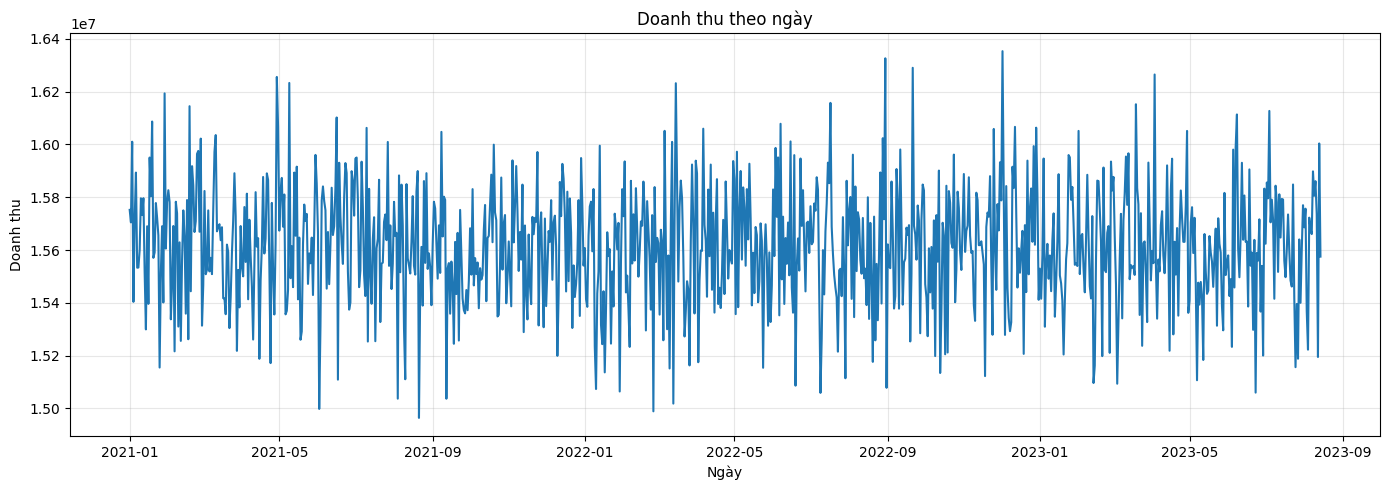

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(daily_revenue["order_day"], daily_revenue["daily_revenue"])
plt.title("Doanh thu theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Doanh thu")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

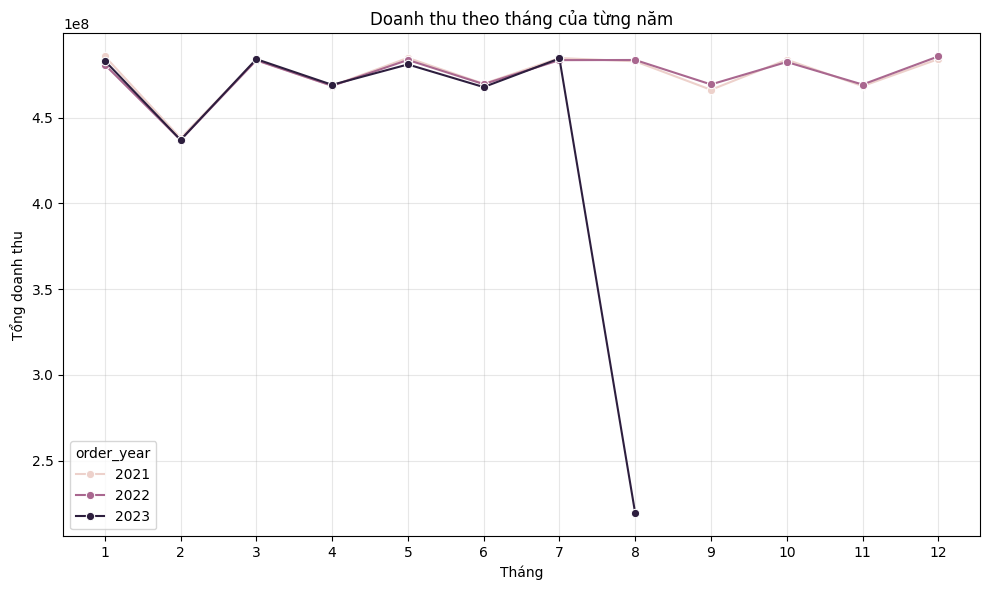

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=monthly_revenue,
    x="order_month",
    y="monthly_revenue",
    hue="order_year",
    marker="o"
)
plt.title("Doanh thu theo tháng của từng năm")
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu")
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

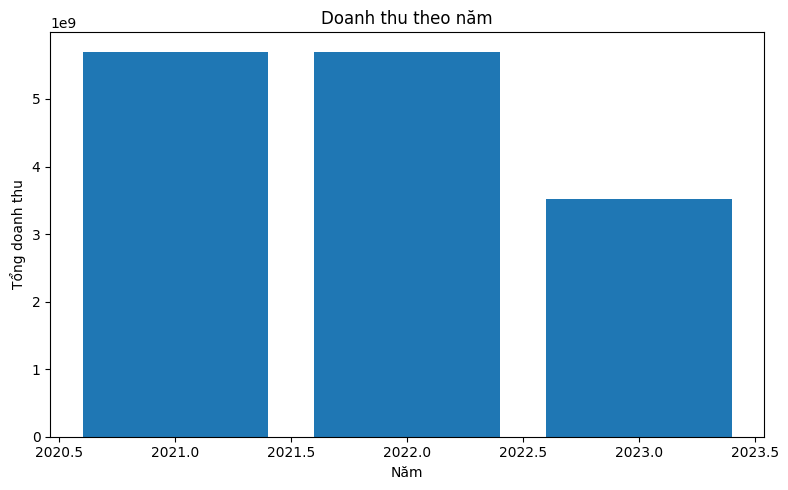

In [12]:
plt.figure(figsize=(8,5))
plt.bar(yearly_revenue["order_year"], yearly_revenue["yearly_revenue"])
plt.title("Doanh thu theo năm")
plt.xlabel("Năm")
plt.ylabel("Tổng doanh thu")
plt.tight_layout()
plt.show()

In [13]:
# doanh thu theo vùng
region_revenue = (
    df.group_by("region")
      .agg(pl.col("revenue").sum().alias("region_revenue"))
      .sort("region_revenue", descending=True)
      .to_pandas()
)

print(region_revenue)

              region  region_revenue
0            Marmara    4.344397e+09
1         İç Anadolu    2.382734e+09
2                Ege    2.155468e+09
3            Akdeniz    1.901209e+09
4  Güneydoğu Anadolu    1.623684e+09
5          Karadeniz    1.417451e+09
6       Doğu Anadolu    1.101169e+09


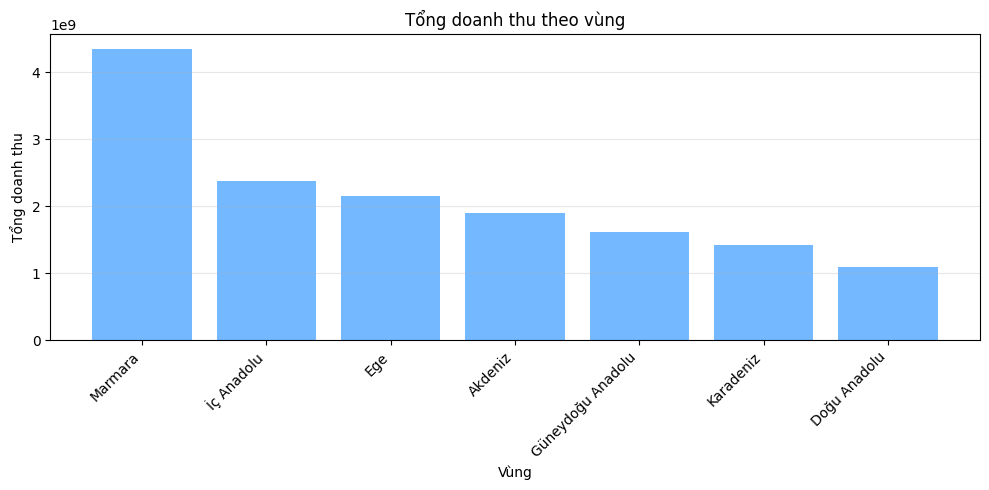

In [16]:
# có thể thấy được Marmara là vùng dẫn đầu về doanh thu với hơn 4.3 tỷ
# các vùng İç Anadolu, Ege và Akdeniz xếp kế tiếp, có doanh thu khá ổn định
# vùng Doğu Anadolu có doanh thu thấp nhất (~1 tỷ), cho thấy nhu cầu hoặc số lượng đơn hàng thấp hơn
# khu vực Marmara là thị trường trọng điểm của doanh nghiệp, chiếm phần lớn doanh thu
# các vùng phía Đông và Bắc (Doğu Anadolu, Karadeniz) cần xem xét chiến lược thúc đẩy bán hàng
plt.figure(figsize=(10,5))
plt.bar(region_revenue["region"], region_revenue["region_revenue"], color="#74b9ff")
plt.title("Tổng doanh thu theo vùng")
plt.xlabel("Vùng")
plt.ylabel("Tổng doanh thu")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

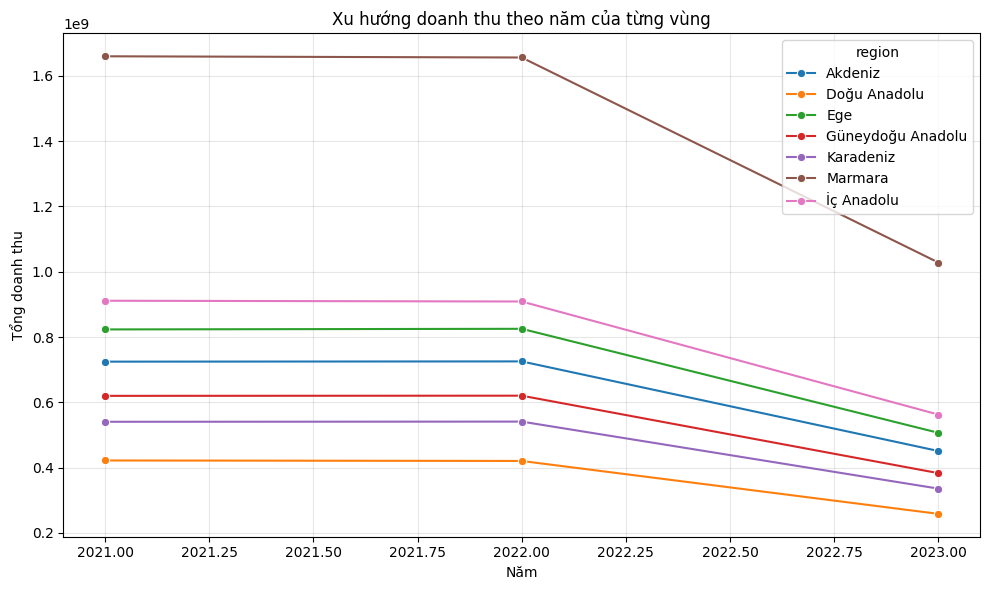

In [17]:
# doanh thu từng vùng theo năm
# các vùng đều có xu hương giảm doanh thu rõ rệt từ 2022 - 2023
# vùng dẫn đầu như Marmara với 1.65 tỷ cũng giảm mạnh xuống còn 1.0 tỷ, các vùng khác đều có sự giảm nhẹ
region_year_revenue = (
    df.group_by(["region", "order_year"])
    .agg(pl.col("revenue").sum().alias("region_revenue"))
    .sort(["region", "order_year"])
    .to_pandas()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=region_year_revenue,
    x="order_year",
    y="region_revenue",
    hue="region",
    marker="o"
)
plt.title("Xu hướng doanh thu theo năm của từng vùng")
plt.xlabel("Năm")
plt.ylabel("Tổng doanh thu")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **2 Phân tích sản phẩm**

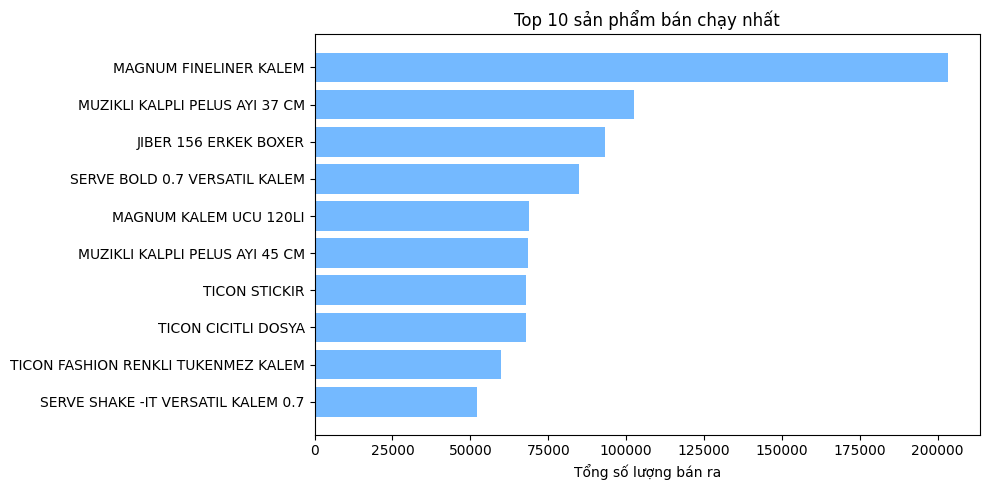

In [21]:
# những sản phẩm bán chạy nhất
top_selling = (
    df.group_by("item_name")
    .agg(pl.col("amount").sum().alias("total_sold"))
    .sort("total_sold", descending=True)
    .head(10)
    .to_pandas()
)

plt.figure(figsize=(10,5))
plt.barh(top_selling["item_name"], top_selling["total_sold"], color="#74b9ff")
plt.title('Top 10 sản phẩm bán chạy nhất')
plt.xlabel('Tổng số lượng bán ra')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

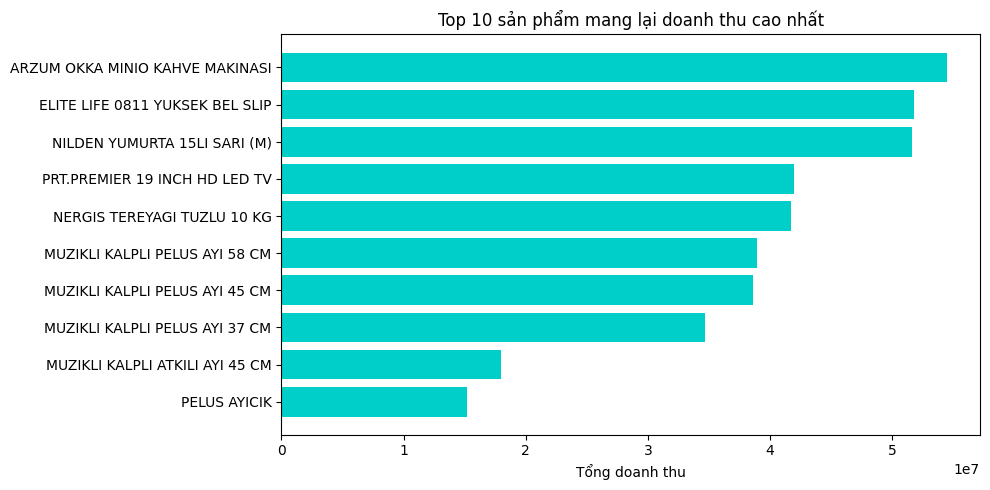

In [22]:
# top những sản phẩm mang lại doanh thu cao nhất
top_revenue = (
    df.group_by("item_name")
    .agg(pl.col("revenue").sum().alias("total_revenue"))
    .sort("total_revenue", descending=True)
    .head(10)
    .to_pandas()
)

plt.figure(figsize=(10,5))
plt.barh(top_revenue["item_name"], top_revenue["total_revenue"], color="#00cec9")
plt.title("Top 10 sản phẩm mang lại doanh thu cao nhất")
plt.xlabel("Tổng doanh thu")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **3 Phân cụm sản phẩm**

In [24]:
from sklearn.preprocessing import StandardScaler

# chuẩn hóa dữ liệu gốc
X = np.array(df["unit_price"]).reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# lấy mẫu 1% (khoảng 500k dòng)
np.random.seed(42)
sample_size = int(len(X_scaled) * 0.01)
sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

print(f'Kích thước mẫu dữ liệu: {len(X_sample)}')

Kích thước mẫu dữ liệu: 511772


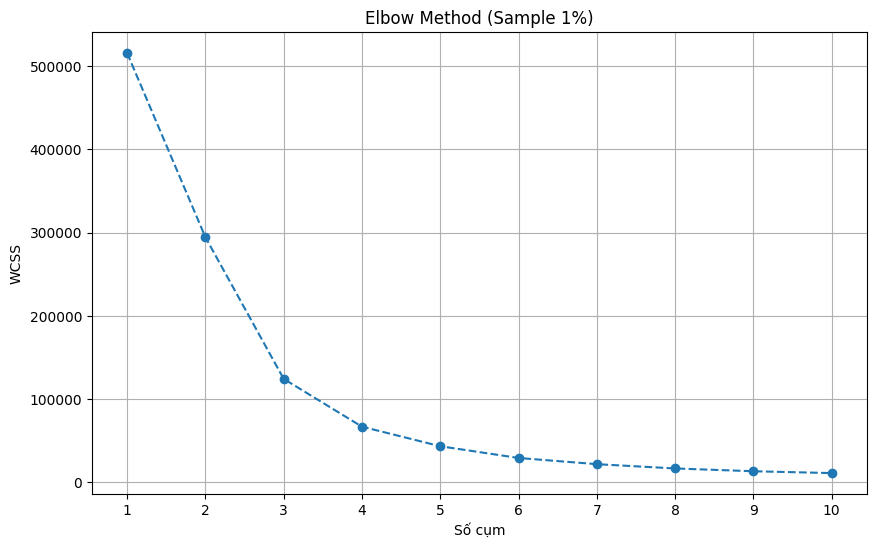

In [27]:
from sklearn.cluster import KMeans

# Elbow Method trên samples
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_sample)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (Sample 1%)')
plt.xlabel('Số cụm')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [28]:
# fit kmeans với 3 cụm - điểm khuỷu tay thể hiện rõ nhất ở cụm 3
N_CLUSTERS = 3

kmeans_final = KMeans(
    n_clusters=N_CLUSTERS,
    init='k-means++',
    random_state=42,
    n_init=10
)

kmeans_final.fit(X_sample)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [29]:
# gán nhãn cụm cho toàn dữ liệu
labels_full = kmeans_final.predict(X_scaled)  # dùng model đã fit

df = df.with_columns(
    pl.Series(name="price_cluster", values=labels_full)
)

In [33]:
# tính trung bình giá của từng cụm
cluster_summary = (
    pl.DataFrame({"unit_price": X.flatten(), "price_cluster": labels_full})
    .group_by("price_cluster")
    .agg(pl.col("unit_price").mean().alias("mean_price"))
    .sort("price_cluster")
)

print(cluster_summary)

shape: (3, 2)
┌───────────────┬────────────┐
│ price_cluster ┆ mean_price │
│ ---           ┆ ---        │
│ i32           ┆ f64        │
╞═══════════════╪════════════╡
│ 0             ┆ 43.887137  │
│ 1             ┆ 5661.62865 │
│ 2             ┆ 285.836661 │
└───────────────┴────────────┘


In [34]:
sorted_clusters = cluster_summary.sort("mean_price")["price_cluster"].to_list()
segment_labels = ["Low-price", "Mid-price", "High-price"]

mapping_df = pl.DataFrame({
    "price_cluster": sorted_clusters,
    "price_segment": segment_labels
})

df = df.join(mapping_df, on="price_cluster", how="left")

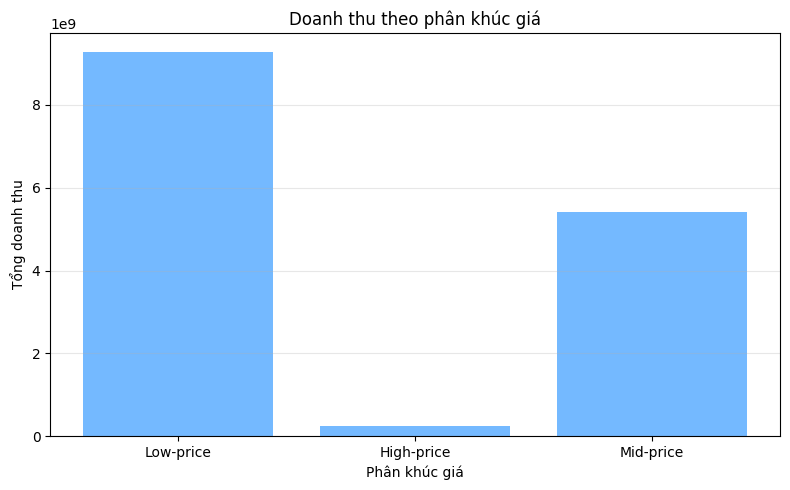

In [35]:
segment_revenue = (
    df.group_by("price_cluster")
    .agg((pl.col("revenue").sum().alias("total_revenue")))
    .join(mapping_df, on="price_cluster", how="left")
    .sort("price_cluster")
    .to_pandas()
)

plt.figure(figsize=(8,5))
plt.bar(segment_revenue["price_segment"], segment_revenue["total_revenue"], color="#74b9ff")
plt.title("Doanh thu theo phân khúc giá")
plt.xlabel("Phân khúc giá")
plt.ylabel("Tổng doanh thu")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **4 Phân tích giỏ hàng**

In [38]:
transaction_data = (
    df
    .select(["order_id", "category4"]) # lọc lấy phân loại chi tiết (category4)
    .group_by("order_id")
    .agg(pl.col("category4").alias("items"))
)

In [39]:
transactions = transaction_data["items"].to_list()

# lọc những đơn hàng chỉ có 1 sản phẩm (đơn có 1 sản phẩm - không tạo được luật)
transactions = [t for t in transactions if len(t) > 1]

print(f"Số giao dịch sau khi lọc: {len(transactions)}")

Số giao dịch sau khi lọc: 9097701


In [41]:
np.random.seed(42)
sample_ratio = 0.05   # 5% đơn hàng sau khi lọc (~450k đơn)
sample_idx = np.random.choice(len(transactions), size=int(len(transactions)*sample_ratio), replace=False)
transactions = [transactions[i] for i in sample_idx]
print(f"Số giao dịch mẫu: {len(transactions):,}")

Số giao dịch mẫu: 454,885


In [42]:
from collections import Counter

# lọc lấy những sản phẩm xuất hiện 1000 lần trong 5% đơn
item_counts = Counter([item for t in transactions for item in t])
TOP_N = 1000
top_items = [item for item, _ in item_counts.most_common(TOP_N)]

filtered_transactions = [
    [i for i in t if i in top_items]
    for t in transactions
    if sum(i in top_items for i in t) > 1
]
print(f"Số giao dịch sau khi lọc: {len(filtered_transactions):,}")

Số giao dịch sau khi lọc: 454,885


In [43]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# mã hóa one-hot cho FP-Growth
transactions_sample = filtered_transactions

te = TransactionEncoder()
te_ary = te.fit(transactions_sample).transform(transactions_sample)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

In [44]:
# chạy FP-Growth
MIN_SUPPORT = 0.002 # lấy những itemset xuất hiện 0.2% trong tổng số giao dịch (0.2% của 454,885 đơn ~910 lần xuất hiện)
itemsets = fpgrowth(df_te, min_support=MIN_SUPPORT, use_colnames=True)
itemsets = itemsets.sort_values("support", ascending=False)

print(f"Tổng số tập phổ biến: {len(itemsets)}")
print(itemsets.head(10))

# luật kết hợp
rules = association_rules(itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values("confidence", ascending=False)
print(rules.head(10))

# support: tỷ lệ xuất hiện của cả A & B trong tất cả giao dịch
# confidence: xác suất khách mua B khi đã mua A
# lift: mức độ A và B có liên hệ mạnh hơn ngẫu nhiên

Tổng số tập phổ biến: 1589
      support                             itemsets
12   0.458934                (KIRTASIYE GERECLERI)
13   0.415250                           (KITAPLAR)
0    0.364686                       (BEBE OYUNCAK)
3    0.245247                         (AYAK GIYIM)
377  0.191081      (KITAPLAR, KIRTASIYE GERECLERI)
302  0.167515  (KIRTASIYE GERECLERI, BEBE OYUNCAK)
303  0.151748             (KITAPLAR, BEBE OYUNCAK)
31   0.117366                              (KAPLI)
308  0.112239    (AYAK GIYIM, KIRTASIYE GERECLERI)
310  0.102265               (AYAK GIYIM, KITAPLAR)
                       antecedents            consequents  antecedent support  \
904                        (KOFTE)  (KIRTASIYE GERECLERI)            0.006149   
822            (AYAK GIYIM, BEYAZ)  (KIRTASIYE GERECLERI)            0.006736   
1372         (KITAPLAR, RENKLILER)  (KIRTASIYE GERECLERI)            0.004392   
1091                       (YESIL)  (KIRTASIYE GERECLERI)            0.005206   
1460   

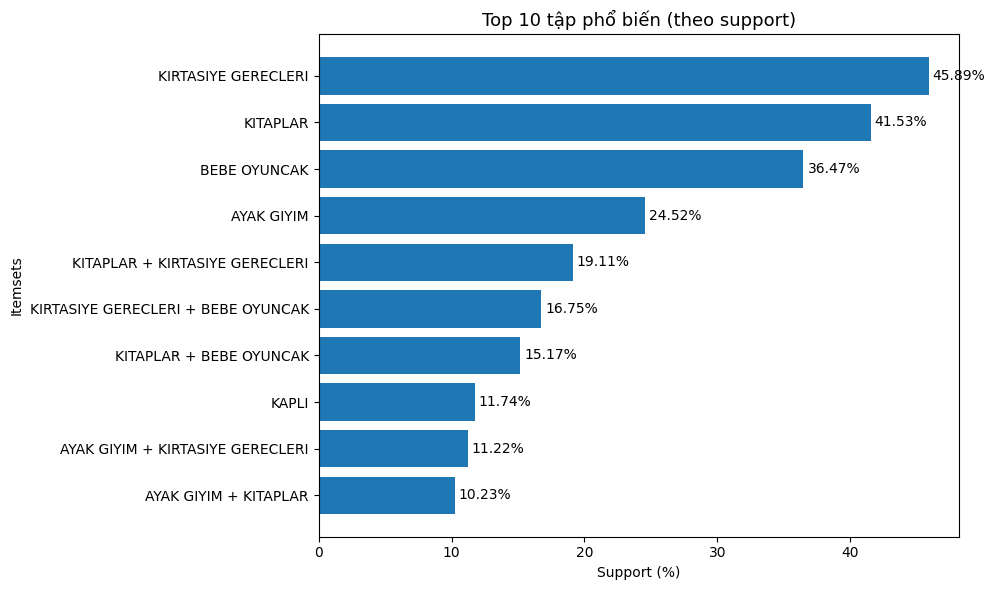

In [45]:
top10 = itemsets.sort_values("support", ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(
    [' + '.join(list(i)) for i in top10['itemsets']],
    top10['support']*100
)
plt.gca().invert_yaxis()
plt.title("Top 10 tập phổ biến (theo support)", fontsize=13)
plt.xlabel("Support (%)")
plt.ylabel("Itemsets")

for bar in bars:
    plt.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.2f}%",
        va='center'
    )

plt.tight_layout()
plt.show()

# nhóm hàng "KIRTASIYE GERECLERI (dụng cụ văn phòng)" có tần xuất mua cao nhất với support khoảng 46% (gần một nửa giao dịch chứa ít nhất một sản phẩm thuộc nhóm này)
# “KITAPLAR” (sách) và “BEBE OYUNCAK” (đồ chơi trẻ em) cũng có tỷ lệ xuất hiện rất cao (≈ 41% và 36%), thể hiện nhu cầu mua sắm hướng tới trẻ em, học sinh và gia đình có con nhỏ
# nhóm “AYAK GIYIM” (giày dép) và “KAPLI” xuất hiện ở vị trí trung bình, cho thấy khách hàng ít mua kèm trực tiếp với nhóm học tập nhưng vẫn là nhóm mua phổ biến độc lập
# đề xuất chiến lược & gợi ý sản phẩm
# 1. Combo bán kèm: tạo gói combo “Bút + Sách + Đồ chơi học tập” dành cho học sinh tiểu học
# 2. Khuyến mãi chéo: khi khách mua văn phòng phẩm (KIRTASIYE), gợi ý thêm sách hoặc đồ chơi trẻ em (KITAPLAR, BEBE OYUNCAK)
# 3. Bố trí quầy hàng hợp lý: đặt khu sách và văn phòng phẩm gần nhau -> tận dụng hành vi mua kèm tự nhiên
# 4. Phát triển sản phẩm theo đối tượng: tập trung quảng bá nhóm học tập - thiếu nhi vì chiếm tỷ lệ cao nhất trong toàn bộ đơn hàng
# 5. Đề xuất trưng bày mùa vụ: trước năm học mới hoặc lễ thiếu nhi, đẩy mạnh combo Bút - Vở - Đồ chơi - Sách thiếu nhi

# **5 Hệ thống gợi ý**

In [7]:
# hệ thống gợi ý
# rule-based - dựa trên tần suất xuất hiện != item-based - dựa trên mức độ tương đồng sản phẩm
# quy tắc nếu A => thì B
# chi cần dữ liệu bán hàng, không cần ma trận user-item
# nhanh nhưng chưa cá nhân hóa
def recommend_for_cart(cart_items, rules, pop_ctx, k=8):
    candidates = {}
    for a in cart_items:
        for _, row in rules[rules['antecedents'].apply(lambda s: a in s)].iterrows():
            for b in row['consequents']:
                if b in cart_items: 
                    continue
                score = 0.5*row['lift'] + 0.4*row['confidence'] + 0.1*row['support']
                candidates[b] = max(candidates.get(b, 0), score)
    for b, p in pop_ctx.items():
        candidates.setdefault(b, 0.05*p)
    return sorted(candidates.items(), key=lambda x: x[1], reverse=True)[:k]

In [8]:
# danh sách sản phẩm khách đang mua
cart_items = ["KITAPLAR", "KIRTASIYE GERECLERI"]

# pop_ctx: độ phổ biến sản phẩm
pop_ctx = dict(zip(itemsets["itemsets"].astype(str), itemsets["support"]))

# gợi ý 3 sản phẩm
RECOMMEND_ITEMS = 3
recommendations = recommend_for_cart(cart_items, rules, pop_ctx, k=RECOMMEND_ITEMS)

for product, score in recommendations:
    match = rules[rules["consequents"].apply(lambda s: product in s)]
    if not match.empty:
        lift = match["lift"].iloc[0]
        conf = match["confidence"].iloc[0]
        supp = match["support"].iloc[0]
        print(f"{product:30s} | Lift: {lift:.3f} | Conf: {conf:.3f} | Supp: {supp:.3f} | Score: {score:.3f}")
    else:
        print(f"{product:30s} | (Không có luật trực tiếp, score = {score:.3f})")

NameError: name 'itemsets' is not defined